In [1]:
import pandas as pd
import numpy as np

from gtda.homology import VietorisRipsPersistence
from gtda.time_series import SingleTakensEmbedding
from gtda.diagrams import BettiCurve, PersistenceLandscape, PairwiseDistance, PersistenceEntropy
from gtda.plotting import plot_point_cloud, plot_diagram
from gtda.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
from sklearn.datasets import make_circles
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from statsmodels.tsa.stattools import acf
from tqdm import tqdm
import nolds
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters

In [2]:
data1 = pd.read_csv("data/gamer3-ppg-2000-01-01.csv")
data2 = pd.read_csv("data/gamer3-ppg-2000-01-02.csv")
data = pd.concat([data1, data2], ignore_index=True)
data.head()

,Time,Red_Signal
0,12:59:28.589593,510.0
1,12:59:28.589593,475.0
2,12:59:28.590597,373.0
3,12:59:28.590843,282.0
4,12:59:28.590843,213.0


In [3]:
data1['Time'] = pd.to_datetime(data1['Time'], format='%H:%M:%S.%f').dt.time
data2['Time'] = pd.to_datetime(data2['Time'], format='%H:%M:%S.%f').dt.time

# Разобьем данные по классам

In [5]:
start_time = pd.to_datetime('11:00:00.000000', format='%H:%M:%S.%f').time()
end_time = pd.to_datetime('14:00:00.000000', format='%H:%M:%S.%f').time()

data_class1 = data1[(data1['Time'] >= start_time) & (data1['Time'] < end_time)]

print(len(data_class1))

362611


In [6]:
start_time1 = pd.to_datetime('14:00:00.000000', format='%H:%M:%S.%f').time()
end_time1 = pd.to_datetime('17:00:00.000000', format='%H:%M:%S.%f').time()

start_time2 = pd.to_datetime('18:00:00.000000', format='%H:%M:%S.%f').time()
end_time2 = pd.to_datetime('19:00:00.000000', format='%H:%M:%S.%f').time()

start_time3 = pd.to_datetime('20:00:00.000000', format='%H:%M:%S.%f').time()
end_time3 = pd.to_datetime('23:00:00.000000', format='%H:%M:%S.%f').time()

start_time4 = pd.to_datetime('10:00:00.000000', format='%H:%M:%S.%f').time()
end_time4 = pd.to_datetime('12:00:00.000000', format='%H:%M:%S.%f').time()

data_class2_1 = data1[(data1['Time'] >= start_time1) & (data1['Time'] < end_time1)]
data_class2_2 = data1[(data1['Time'] >= start_time2) & (data1['Time'] < end_time2)]
data_class2_3 = data1[(data1['Time'] >= start_time3) & (data1['Time'] < end_time3)]
data_class2_4 = data2[(data2['Time'] >= start_time4) & (data2['Time'] < end_time4)]

data_class2 = pd.concat([data_class2_1, data_class2_2, data_class2_3, data_class2_4], ignore_index=True)

print(len(data_class2))

1584441


In [7]:
start_time1 = pd.to_datetime('17:00:00.000000', format='%H:%M:%S.%f').time()
end_time1 = pd.to_datetime('18:00:00.000000', format='%H:%M:%S.%f').time()

start_time2 = pd.to_datetime('19:00:00.000000', format='%H:%M:%S.%f').time()
end_time2 = pd.to_datetime('20:00:00.000000', format='%H:%M:%S.%f').time()

start_time3 = pd.to_datetime('23:00:00.000000', format='%H:%M:%S.%f').time()
end_time3 = pd.to_datetime('00:00:00.000000', format='%H:%M:%S.%f').time()

start_time4 = pd.to_datetime('00:00:00.000000', format='%H:%M:%S.%f').time()
end_time4 = pd.to_datetime('01:00:00.000000', format='%H:%M:%S.%f').time()

start_time5 = pd.to_datetime('09:00:00.000000', format='%H:%M:%S.%f').time()
end_time5 = pd.to_datetime('10:00:00.000000', format='%H:%M:%S.%f').time()

data_class3_1 = data1[(data1['Time'] >= start_time1) & (data1['Time'] < end_time1)]
data_class3_2 = data1[(data1['Time'] >= start_time2) & (data1['Time'] < end_time2)]
data_class3_3 = data1[(data1['Time'] >= start_time3) & (data1['Time'] < end_time3)]
data_class3_4 = data2[(data2['Time'] >= start_time4) & (data2['Time'] < end_time4)]
data_class3_5 = data2[(data2['Time'] >= start_time5) & (data2['Time'] < end_time5)]

data_class3 = pd.concat([data_class3_1, data_class3_2, data_class3_3, data_class3_4, data_class3_5], ignore_index=True)

print(len(data_class3))

952450


In [8]:
start_time1 = pd.to_datetime('01:00:00.000000', format='%H:%M:%S.%f').time()
end_time1 = pd.to_datetime('03:00:00.000000', format='%H:%M:%S.%f').time()

start_time2 = pd.to_datetime('04:00:00.000000', format='%H:%M:%S.%f').time()
end_time2 = pd.to_datetime('05:00:00.000000', format='%H:%M:%S.%f').time()

start_time3 = pd.to_datetime('08:00:00.000000', format='%H:%M:%S.%f').time()
end_time3 = pd.to_datetime('09:00:00.000000', format='%H:%M:%S.%f').time()

data_class4_1 = data2[(data2['Time'] >= start_time1) & (data2['Time'] < end_time1)]
data_class4_2 = data2[(data2['Time'] >= start_time2) & (data2['Time'] < end_time2)]
data_class4_3 = data2[(data2['Time'] >= start_time3) & (data2['Time'] < end_time3)]

data_class4 = pd.concat([data_class4_1, data_class4_2, data_class4_3], ignore_index=True)

print(len(data_class4))

1362596


In [9]:
start_time1 = pd.to_datetime('03:00:00.000000', format='%H:%M:%S.%f').time()
end_time1 = pd.to_datetime('04:00:00.000000', format='%H:%M:%S.%f').time()

data_class5 = data2[(data2['Time'] >= start_time1) & (data2['Time'] < end_time1)]

print(len(data_class5))

359189


In [10]:
start_time1 = pd.to_datetime('05:00:00.000000', format='%H:%M:%S.%f').time()
end_time1 = pd.to_datetime('06:00:00.000000', format='%H:%M:%S.%f').time()

data_class6 = data2[(data2['Time'] >= start_time1) & (data2['Time'] < end_time1)]

print(len(data_class6))

348585


In [11]:
start_time1 = pd.to_datetime('06:00:00.000000', format='%H:%M:%S.%f').time()
end_time1 = pd.to_datetime('07:00:00.000000', format='%H:%M:%S.%f').time()

data_class7 = data2[(data2['Time'] >= start_time1) & (data2['Time'] < end_time1)]

print(len(data_class7))

349024


# Объединим классы 1-3 в класс "Active" и классы 4-7 в класс "Tired"

In [12]:
data_active = pd.concat([data_class1, data_class2, data_class3], ignore_index=True)
data_tired = pd.concat([data_class4, data_class5, data_class6, data_class7], ignore_index=True)

# Сократим ВР, взяв медиану по бинам

In [13]:
def reduce_TS(data, num_bins):

    # num_bins = 1000

    # Размер каждого бина
    bin_size = len(data) // num_bins

    # Создание бинов
    data['bin'] = (data.index // bin_size)

    # Вычисление медианы для каждого бина
    median_per_bin = data.groupby('bin')['Red_Signal'].median().reset_index()

    # Переименование столбцов для ясности
    median_per_bin.columns = ['bin', 'Red_Signal_median']
    median_per_bin.drop(0, inplace=True)
    # print(median_per_bin)

    # fig = go.Figure(data=go.Scatter(y=median_per_bin['Red_Signal_median']))
    # fig.update_layout(xaxis_title='bin', yaxis_title='Red_Signal_median')
    # fig.show()

    return median_per_bin

In [14]:
median_per_bin1 = reduce_TS(data_active, 1000)
median_per_bin2 = reduce_TS(data_tired, 1000)

# Оценим параметр задержки методом автокорреляционной функции

In [15]:
max_delay = 1000
acf_y = acf(median_per_bin1['Red_Signal_median'], nlags=max_delay)

fig = go.Figure(data=go.Scatter(y=acf_y))
fig.update_layout(xaxis_title='Time delay', yaxis_title='Autocorr func')
fig.show()

Автокорреляционная функция впервые пересекает 0 между значениями задержки 67 и 68, но наиболее близки к нулю значения 66 и 71

In [16]:
max_delay = 1000
acf_y = acf(median_per_bin2['Red_Signal_median'], nlags=max_delay)

fig = go.Figure(data=go.Scatter(y=acf_y))
fig.update_layout(xaxis_title='Time delay', yaxis_title='Autocorr func')
fig.show()

Автокорреляционная функция впервые пересекает 0 между значениями задержки 159 и 160, но наиболее близки к нулю значения 162 и 164

# Оценим параметр размерности пространства вложения d с помощью метода Грассберга-Прокаччиа

In [17]:
# Грассбер-Прокаччи
def get_corr_dims(data, dims: list[int]) -> list[int]:
    corr_dims_list = []
    for embd_dim in tqdm(dims):
        corr_dim = nolds.corr_dim(data, embd_dim)
        corr_dims_list.append(corr_dim)
    return corr_dims_list

100%|██████████| 30/30 [00:05<00:00,  5.19it/s]


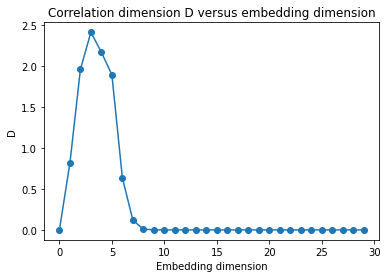

Max emb dimension periodic: 3


In [18]:
embd_dims_list = list(range(30))
corr_dims = get_corr_dims(median_per_bin1['Red_Signal_median'], embd_dims_list)

plt.plot(embd_dims_list, corr_dims, 'o-')
plt.xlabel("Embedding dimension")
plt.ylabel("D")
plt.title("Correlation dimension D versus embedding dimension")
plt.show()
print(f'Max emb dimension periodic: {max(enumerate(corr_dims), key=lambda x: x[1])[0]}')

100%|██████████| 30/30 [00:06<00:00,  4.78it/s]


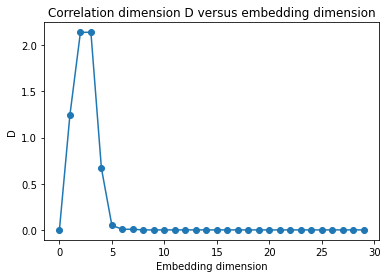

Max emb dimension periodic: 3


In [19]:
embd_dims_list = list(range(30))
corr_dims = get_corr_dims(median_per_bin2['Red_Signal_median'], embd_dims_list)

plt.plot(embd_dims_list, corr_dims, 'o-')
plt.xlabel("Embedding dimension")
plt.ylabel("D")
plt.title("Correlation dimension D versus embedding dimension")
plt.show()
print(f'Max emb dimension periodic: {max(enumerate(corr_dims), key=lambda x: x[1])[0]}')

Будем вкладывать ВР в пространство размерности 3.

# Найдем оптимальные параметры для вложений Таккенса

In [26]:
embedding_time_delay_periodic1, embedding_dimension_periodic1 = takens_embedding_optimal_parameters(median_per_bin1['Red_Signal_median'], max_time_delay=71, max_dimension=5,  n_jobs=-1)
embedding_time_delay_periodic2, embedding_dimension_periodic2 = takens_embedding_optimal_parameters(median_per_bin2['Red_Signal_median'], max_time_delay=164, max_dimension=5,  n_jobs=-1)

print(f"({embedding_time_delay_periodic1}, {embedding_dimension_periodic1})")
print(f"({embedding_time_delay_periodic2}, {embedding_dimension_periodic2})")

(71, 4)
(115, 5)


# Произведем вложения Таккенса в пространство вложения

In [27]:
embedder1 = SingleTakensEmbedding(
    parameters_type="fixed",
    time_delay=embedding_time_delay_periodic1,
    dimension=embedding_dimension_periodic1,
    # уменьшение time delay emb
    stride = 1
)

Accelerometer_point_cloud1 = embedder1.fit_transform(median_per_bin1['Red_Signal_median'])
plot_point_cloud(Accelerometer_point_cloud1).show()

In [28]:
embedder2 = SingleTakensEmbedding(
    parameters_type="fixed",
    time_delay=embedding_time_delay_periodic2,
    dimension=embedding_dimension_periodic2,
    # уменьшение time delay emb
    stride = 1
)

Accelerometer_point_cloud2 = embedder2.fit_transform(median_per_bin2['Red_Signal_median'])
plot_point_cloud(Accelerometer_point_cloud2).show()

# Построим диаграммы персистентности с помощью вложений Виториса-Рипса

In [29]:
# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions
)

In [30]:
diagrams = persistence.fit_transform([Accelerometer_point_cloud1, Accelerometer_point_cloud2])

In [31]:
VR = VietorisRipsPersistence()
VR.plot(diagrams, sample=0)

In [32]:
VR = VietorisRipsPersistence()
VR.plot(diagrams, sample=1)

# Построим кривые Бэтти

In [33]:
BC = BettiCurve()
betti_curves = BC.fit_transform(diagrams)
BC.plot(betti_curves, sample=0)

In [34]:
BC = BettiCurve()
betti_curves = BC.fit_transform(diagrams)
BC.plot(betti_curves, sample=1)

# Посчитаем попарные расстояния между кривыми Бэтти

In [40]:
diagrams.shape

(2, 1354, 3)

In [41]:
diagrams

array([[[0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        ...,
        [3.1622777 , 3.1622777 , 2.        ],
        [3.1622777 , 3.1622777 , 2.        ],
        [3.1622777 , 3.1622777 , 2.        ]],

       [[0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 1.41421354, 0.        ],
        ...,
        [5.38516474, 5.47722578, 2.        ],
        [5.09901953, 5.19615221, 2.        ],
        [5.        , 5.47722578, 2.        ]]])

In [94]:
# PD = PairwiseDistance(metric='betti',
#                       metric_params={'p': 1},
#                       order=None)

# pair_dist = PD.fit_transform(diagrams) # shape (2, 2, 3)

# pair_dist#.shape#[0, :, :]

betti_curve = BettiCurve()
betti_curves = betti_curve.fit_transform(diagrams)

In [64]:
betti_curves.shape

(2, 3, 100)

In [69]:
betti_curves

array([[[785, 785, 785, 785, 772, 772, 743, 696, 677, 617, 541, 504,
         436, 375, 343, 289, 264, 230, 193, 175, 158, 153, 134, 122,
         110, 100,  91,  85,  80,  70,  67,  63,  52,  50,  48,  44,
          40,  38,  37,  36,  34,  32,  30,  26,  23,  21,  18,  17,
          14,  12,  12,  12,  12,  11,  10,   9,   9,   9,   8,   8,
           8,   8,   8,   8,   7,   5,   4,   4,   4,   4,   4,   4,
           4,   4,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
           3,   3,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
           2,   2,   2,   0],
        [  3,   3,   3,   5,   5,  24,  38,  49,  66,  69,  83,  86,
          89,  96,  94,  83,  65,  63,  59,  56,  48,  48,  49,  50,
          50,  49,  52,  48,  45,  45,  38,  31,  20,  20,  19,  14,
          14,  12,  10,   8,   9,   7,   8,   7,   7,   7,   9,   8,
           8,   9,   7,   8,   9,  10,   9,   9,   6,   4,   6,   7,
           7,   6,   5,   6,   5,   7,   8,   9,   9,   9,   8,   9,
    

In [93]:
transposed_array = np.transpose(betti_curves, (0, 2, 1))
transposed_array

array([[[785,   3,   1],
        [785,   3,   1],
        [785,   3,   0],
        [785,   5,   0],
        [772,   5,   0],
        [772,  24,   1],
        [743,  38,   1],
        [696,  49,   2],
        [677,  66,   3],
        [617,  69,   5],
        [541,  83,   7],
        [504,  86,   6],
        [436,  89,   8],
        [375,  96,   7],
        [343,  94,  12],
        [289,  83,  11],
        [264,  65,   9],
        [230,  63,  11],
        [193,  59,   5],
        [175,  56,   7],
        [158,  48,   2],
        [153,  48,   4],
        [134,  49,   3],
        [122,  50,   7],
        [110,  50,  10],
        [100,  49,  13],
        [ 91,  52,  10],
        [ 85,  48,   8],
        [ 80,  45,   9],
        [ 70,  45,   7],
        [ 67,  38,   5],
        [ 63,  31,   5],
        [ 52,  20,   3],
        [ 50,  20,   3],
        [ 48,  19,   3],
        [ 44,  14,   3],
        [ 40,  14,   4],
        [ 38,  12,   5],
        [ 37,  10,   3],
        [ 36,   8,   2],


In [82]:
means = np.mean(transposed_array, axis=1, keepdims=True)

means

array([[[128.1 ,  21.2 ,   2.3 ]],

       [[ 92.51,  17.24,   3.6 ]]])

In [99]:
differences = np.abs(transposed_array - means)

differences

array([[[6.5690e+02, 1.8200e+01, 1.3000e+00],
        [6.5690e+02, 1.8200e+01, 1.3000e+00],
        [6.5690e+02, 1.8200e+01, 2.3000e+00],
        [6.5690e+02, 1.6200e+01, 2.3000e+00],
        [6.4390e+02, 1.6200e+01, 2.3000e+00],
        [6.4390e+02, 2.8000e+00, 1.3000e+00],
        [6.1490e+02, 1.6800e+01, 1.3000e+00],
        [5.6790e+02, 2.7800e+01, 3.0000e-01],
        [5.4890e+02, 4.4800e+01, 7.0000e-01],
        [4.8890e+02, 4.7800e+01, 2.7000e+00],
        [4.1290e+02, 6.1800e+01, 4.7000e+00],
        [3.7590e+02, 6.4800e+01, 3.7000e+00],
        [3.0790e+02, 6.7800e+01, 5.7000e+00],
        [2.4690e+02, 7.4800e+01, 4.7000e+00],
        [2.1490e+02, 7.2800e+01, 9.7000e+00],
        [1.6090e+02, 6.1800e+01, 8.7000e+00],
        [1.3590e+02, 4.3800e+01, 6.7000e+00],
        [1.0190e+02, 4.1800e+01, 8.7000e+00],
        [6.4900e+01, 3.7800e+01, 2.7000e+00],
        [4.6900e+01, 3.4800e+01, 4.7000e+00],
        [2.9900e+01, 2.6800e+01, 3.0000e-01],
        [2.4900e+01, 2.6800e+01, 1

In [92]:
norms_l1 = np.sum(np.abs(differences), axis=1)

norms_l1

array([[16531.4 ,  2001.2 ,   255.4 ],
       [13372.58,  2102.  ,   490.  ]])

In [100]:
plot_point_cloud(differences[0,:,:])


In [101]:
labels1 = np.zeros_like(differences[0, :, :])
labels2 = np.ones_like(differences[1, :, :])

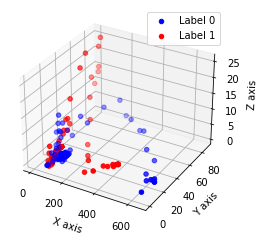

In [102]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(differences[0, :, 0], differences[0, :, 1], differences[0, :, 2], c='blue', label='Label 0')
ax.scatter(differences[1, :, 0], differences[1, :, 1], differences[1, :, 2], c='red', label='Label 1')

ax.legend()

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [104]:
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo

trace1 = go.Scatter3d(
    x=differences[0, :, 0],
    y=differences[0, :, 1],
    z=differences[0, :, 2],
    mode='markers',
    marker=dict(color='blue'),
    name='Label 0'
)

trace2 = go.Scatter3d(
    x=differences[1, :, 0],
    y=differences[1, :, 1],
    z=differences[1, :, 2],
    mode='markers',
    marker=dict(color='red'),
    name='Label 1'
)

data = [trace1, trace2]

layout = go.Layout(
    title='3D Scatter Plot',
    scene=dict(
        xaxis=dict(title='X axis'),
        yaxis=dict(title='Y axis'),
        zaxis=dict(title='Z axis')
    )
)

fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='3d_scatter_plot.html')


'3d_scatter_plot.html'

In [108]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = np.vstack((differences[0], differences[1]))
y = np.concatenate((labels1, labels2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Predicted labels:', y_pred)

Accuracy: 0.92
Predicted labels: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
